Class Assignment - Data Mining Week 3

In [891]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [892]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [893]:
df = df.drop(columns=['ID'], errors='ignore')

### View summary of dataset

In [894]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      10000 non-null  int64  
 1   Gender                   10000 non-null  object 
 2   Country                  10000 non-null  object 
 3   Coffee_Intake            10000 non-null  float64
 4   Caffeine_mg              10000 non-null  float64
 5   Sleep_Hours              10000 non-null  float64
 6   Sleep_Quality            10000 non-null  object 
 7   BMI                      10000 non-null  float64
 8   Heart_Rate               10000 non-null  int64  
 9   Stress_Level             10000 non-null  object 
 10  Physical_Activity_Hours  10000 non-null  float64
 11  Health_Issues            4059 non-null   object 
 12  Occupation               10000 non-null  object 
 13  Smoking                  10000 non-null  int64  
 14  Alcohol_Consumption    

In [895]:
df.describe()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [896]:
for col in df:
    print(df[col].value_counts())

Age
18    935
34    354
32    352
37    346
35    338
38    325
31    310
30    310
40    308
36    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
51    133
19    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
64     14
65     14
66     13
70      8
67      8
68      8
72      7
80      2
71      2
73      2
69      2
77      1
75      1
Name: count, dtype: int64
Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain    

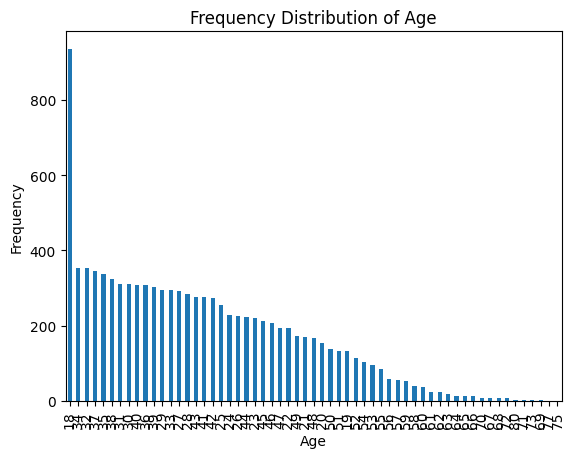

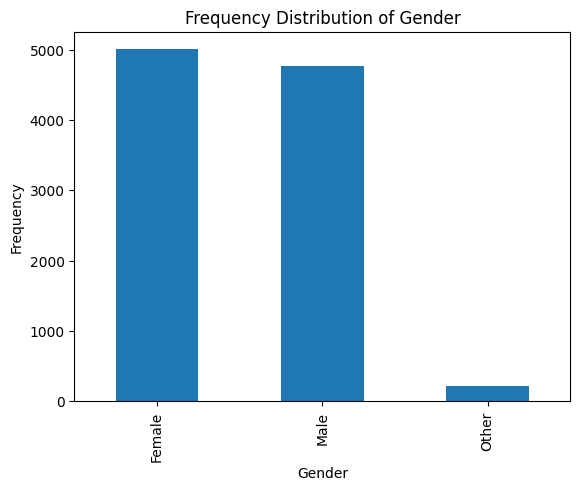

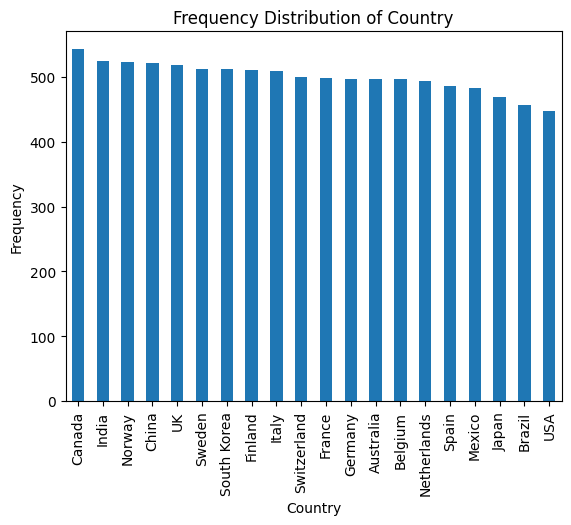

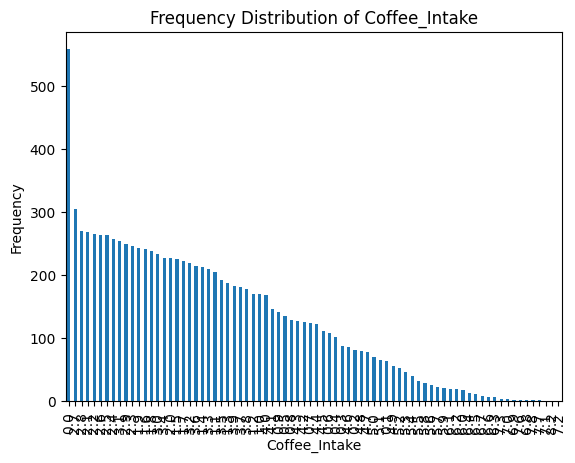

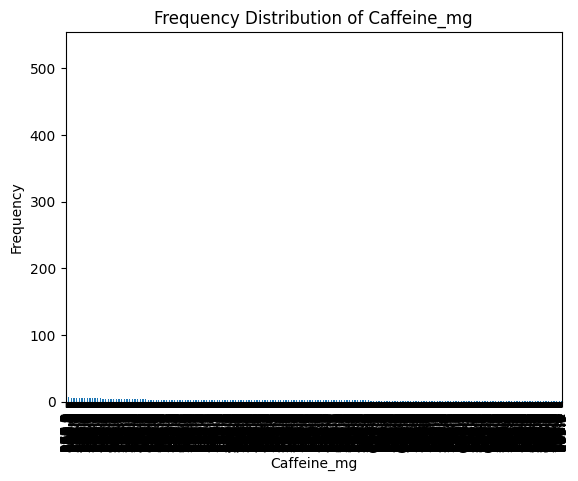

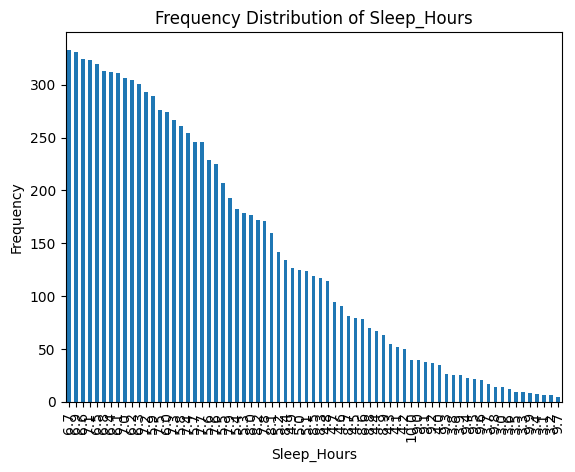

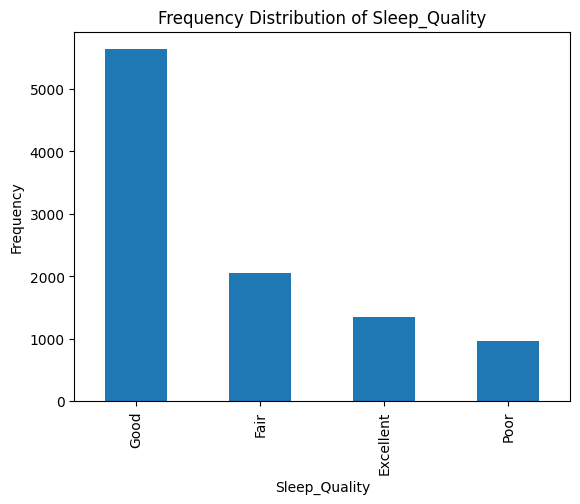

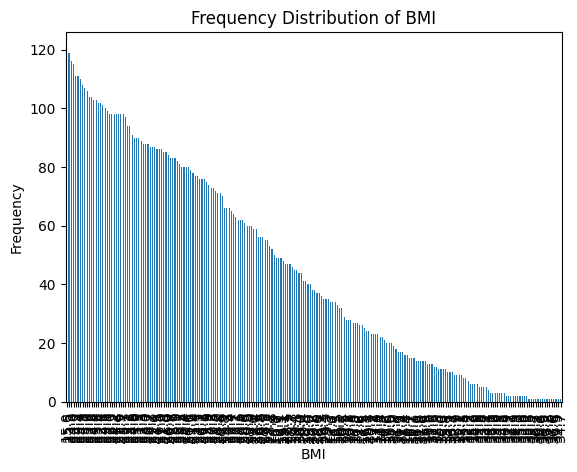

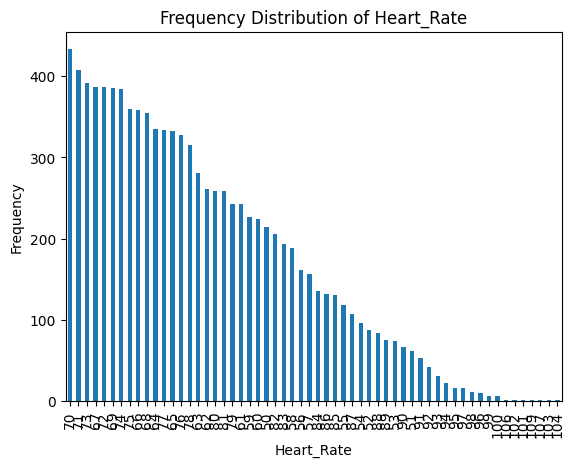

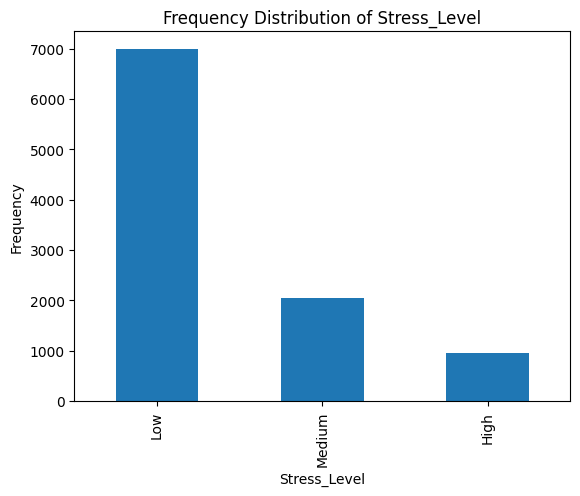

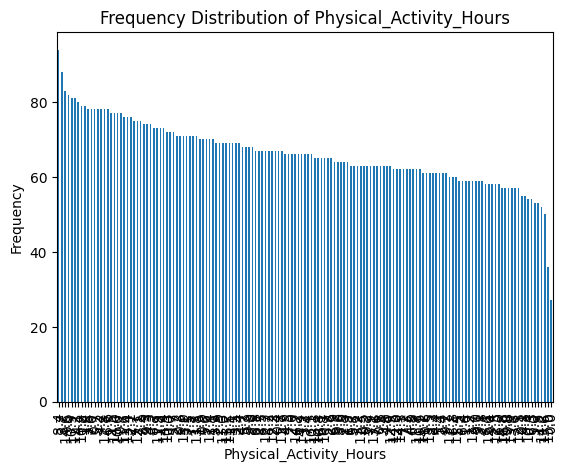

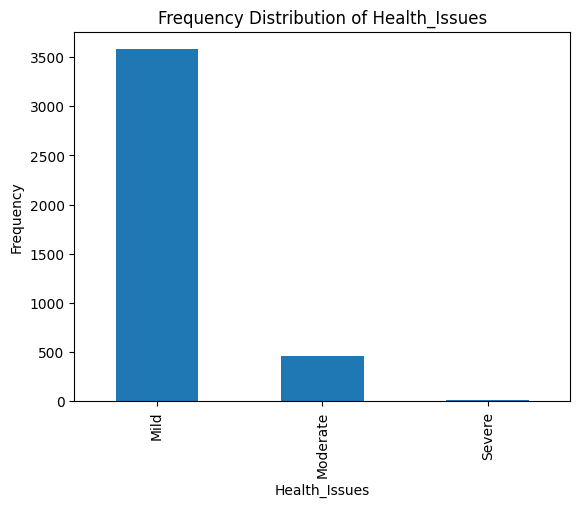

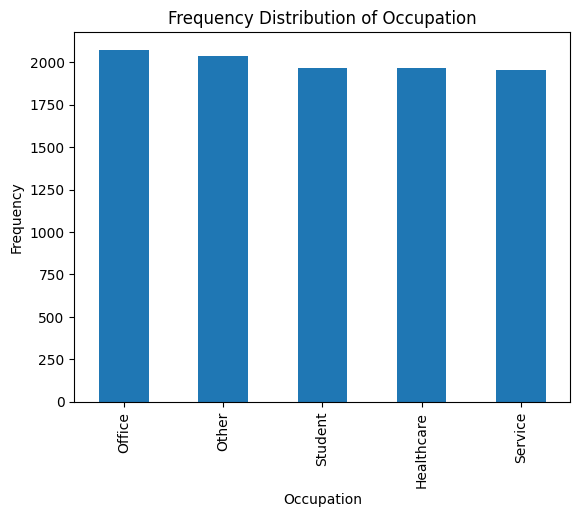

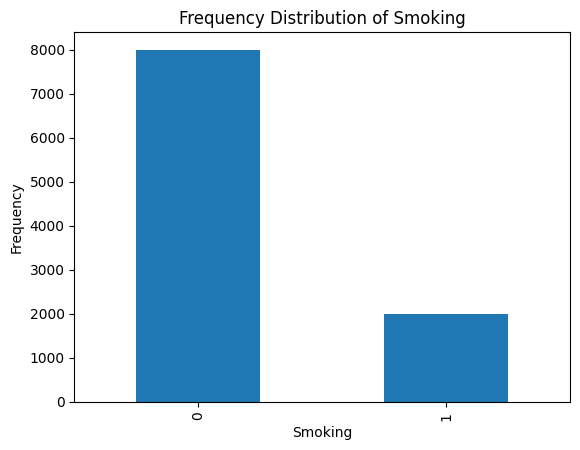

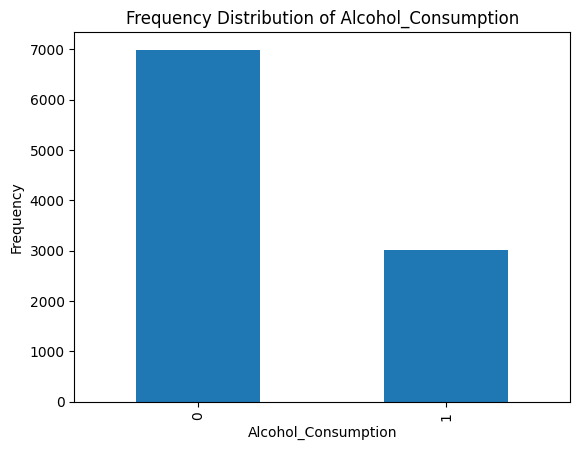

In [859]:
for col in df:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Explore `class` variable

In [860]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
Mild,3579
Moderate,463
Severe,17


In [861]:
df['Health_Issues'] = df['Health_Issues'].fillna('None')

The `class` target variable is ordinal in nature.

In [862]:
# check missing values in variables

df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0


### Encode categorical variables


Now, I will encode the categorical variables.

In [863]:
# See the unique values for each column
for column in ['Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg','Sleep_Hours','Sleep_Quality','BMI', 'Heart_Rate', 'Stress_Level', 'Physical_Activity_Hours', 'Health_Issues', 'Occupation' ,'Smoking', 'Alcohol_Consumption']:
  print(df[column].unique())

[40 33 42 53 32 44 29 41 37 18 28 22 38 24 52 35 36 21 39 27 31 57 34 20
 19 43 26 47 30 46 51 25 45 64 48 61 23 50 67 80 62 60 56 54 49 59 58 71
 55 65 66 63 73 72 68 70 69 77 75]
['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
[3.5 1.  5.3 2.6 3.1 3.4 2.7 4.5 1.7 4.  4.1 4.7 1.4 3.2 4.3 0.7 2.2 0.
 2.4 4.6 0.4 1.9 0.8 2.5 1.5 2.8 4.4 3.8 2.  3.3 2.1 3.6 1.6 1.1 0.9 4.9
 0.1 5.4 1.3 0.6 1.8 2.9 4.2 2.3 3.9 1.2 7.6 0.2 7.1 5.2 0.5 3.7 5.  6.2
 3.  4.8 5.1 7.3 5.8 5.9 6.1 5.5 5.7 6.4 0.3 5.6 6.7 6.  6.5 6.3 8.2 7.2
 7.  6.6 7.8 6.8 7.7 6.9]
[328.1  94.1 503.7 ... 460.2 509.1  59.1]
[ 7.5  6.2  5.9  7.3  5.3  6.4  7.8  5.5  7.1  8.1  6.5  6.9  6.6  6.8
  7.7  5.7  5.   6.1  6.   8.3  9.2  7.9  4.8  7.4  7.   7.2  5.8  9.4
  7.6  8.   5.4  8.2  6.3  4.5  9.6  5.2  4.7  4.6  8.7  4.9  9.8  6.7
  5.6  8.8  4.2  8.5 10.   8

In [864]:
# Encoding from categorical to numerical
gender_map = {'Male': 0, 'Female': 1, 'Other': 2}
sleep_map = {'Poor': 1, 'Fair': 2, 'Good': 3, 'Excellent': 4}
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {'Other': 0, 'Healthcare': 1, 'Student': 2, 'Office': 3, 'Service': 4}

country_map = {
    'Germany': 1,
    'Brazil': 2,
    'Spain': 3,
    'Mexico': 4,
    'France': 5,
    'Canada': 6,
    'UK': 7,
    'Switzerland': 8,
    'Netherlands': 9,
    'Italy': 10,
    'China': 11,
    'Japan': 12,
    'Belgium': 13,
    'Finland': 14,
    'Australia': 15,
    'USA': 16,
    'Sweden': 17,
    'India': 18,
    'Norway': 19,
    'South Korea': 20
}

health_map = {
    'None': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}

df['Gender'] = df['Gender'].map(gender_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Country'] = df['Country'].map(country_map)
df['Health_Issues'] = df['Health_Issues'].map(health_map)


df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
245,30,0,13,3.1,291.7,7.2,3,27.0,66,1,4.7,0,0,1,0
4269,46,0,5,3.0,282.7,6.8,3,27.3,83,1,1.0,0,4,0,0
5413,45,0,10,0.8,76.8,5.2,2,26.3,81,2,2.5,1,3,0,0
2141,35,1,13,1.5,138.8,5.8,2,25.4,65,2,9.1,1,3,1,0
7049,21,1,14,3.6,343.1,7.3,3,16.0,59,1,8.3,0,4,0,0


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [865]:
# Declaring X and Y variables
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [866]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,0,1,3.5,328.1,7.5,3,24.9,78,1,14.5,0,0,0
1,33,0,1,1.0,94.1,6.2,3,20.0,67,1,11.0,4,0,0
2,42,0,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,0,1,2.6,249.2,7.3,3,24.7,71,1,6.6,0,0,0
4,32,1,3,3.1,298.0,5.3,2,24.1,76,2,8.5,2,0,1


In [867]:
y.head()

,Health_Issues
0,0
1,0
2,1
3,1
4,1


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [868]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [869]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [870]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,0,3,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,26,0,18,0.0,0.0,5.5,2,28.3,75,2,10.8,0,0,0
1670,32,0,20,2.8,268.1,7.3,3,27.4,69,1,8.6,3,0,0
6087,18,0,20,2.2,208.6,8.1,4,16.3,83,1,8.9,0,0,1
6669,43,1,7,2.6,251.1,9.4,4,25.4,68,1,3.4,3,0,0


In [871]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,0,19,2.6,245.9,6.7,3,30.1,76,1,1.9,4,0,1
4684,22,1,4,3.1,293.1,7.6,3,20.4,69,1,5.0,4,0,0
1731,30,0,15,3.9,372.4,6.4,3,27.5,75,1,13.8,3,0,0
4742,35,0,1,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,47,0,10,1.3,119.0,6.9,3,28.4,64,1,9.6,3,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [872]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [873]:
# max dept menentukan nanti tree nya seberapa
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

### Predict the Test set results with criterion gini index

In [874]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [875]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


### Visualize decision-trees

[Text(0.5, 0.9, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.125, 0.1, 'gini = 0.49\nsamples = 14\nvalue = [0, 6, 8, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 132\nvalue = [0, 0, 132, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.103\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.8, '  False'),
 Text(0.625, 0.5, 'x[7] <= 29.95

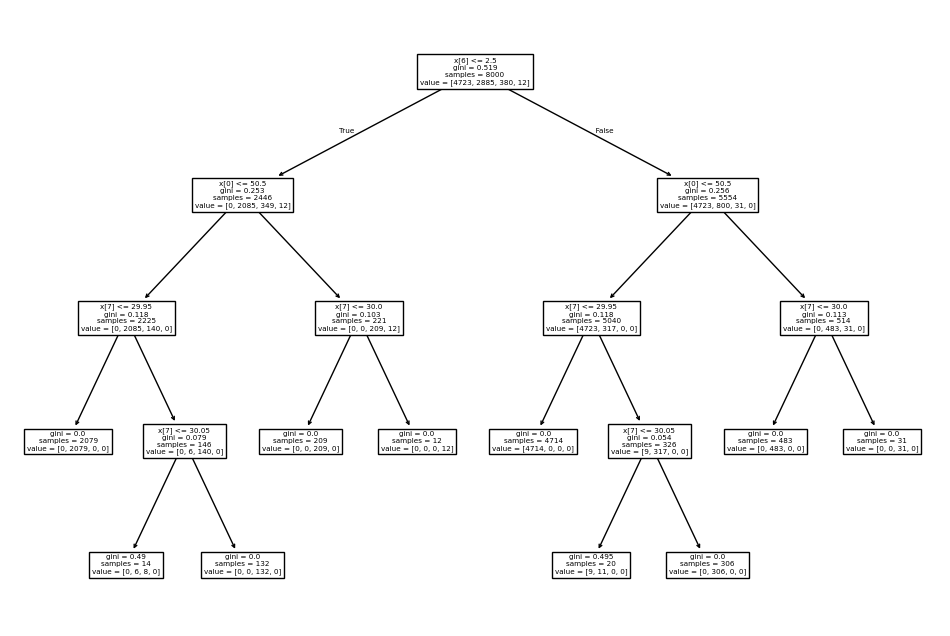

In [876]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [877]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

### Predict the Test set results with criterion entropy

In [878]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [879]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


### Visualize decision-trees

[Text(0.5, 0.875, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.247\nsamples = 146\nvalue = [0, 6, 140, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.304\nsamples = 221\nvalue = [0, 0, 209, 12]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 209\nvalue = [0, 0, 209, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsample

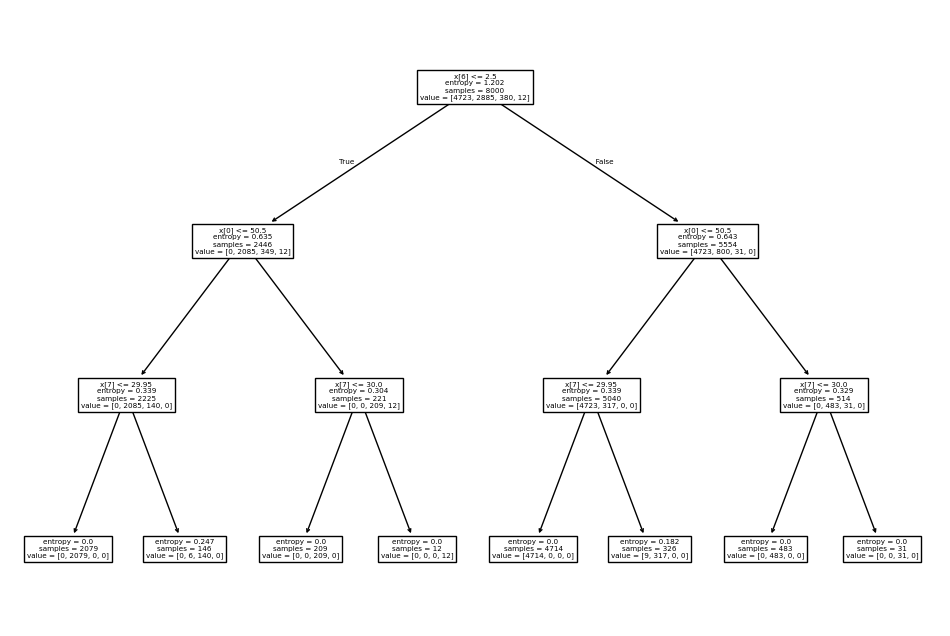

In [880]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [881]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [882]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [883]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8580


### Visualization

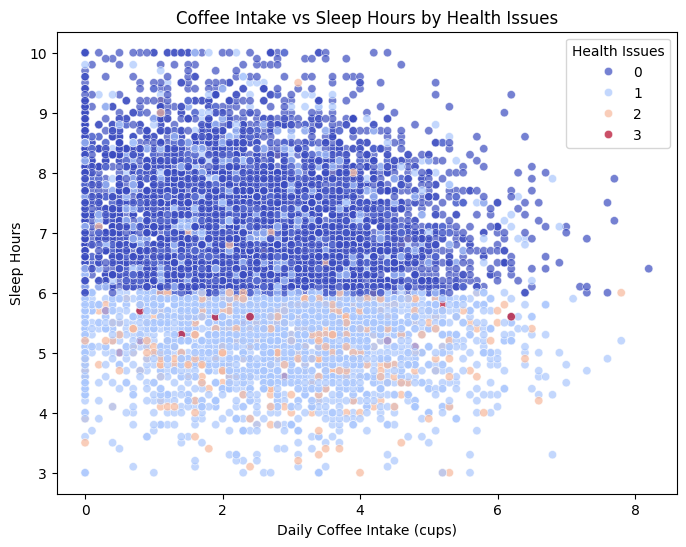

In [884]:
# Scatter Plot of Coffee Intake vs Sleep Hours by Health Issues

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Coffee_Intake",
    y="Sleep_Hours",
    hue="Health_Issues",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Coffee Intake vs Sleep Hours by Health Issues")
plt.xlabel("Daily Coffee Intake (cups)")
plt.ylabel("Sleep Hours")
plt.legend(title="Health Issues")
plt.show()

This scatterplot illustrates the relationship between daily coffee intake and sleep hours, categorized by health issues. The overall pattern shows that individuals who consume higher amounts of coffee tend to sleep fewer hours. Most of the data points with no reported health issues (coded as 0) are concentrated in the mid-range of 6–8 hours of sleep and low to moderate coffee intake. In contrast, moderate to severe health issues (coded as 2 and 3) are more frequently observed among individuals with both shorter sleep durations (below 6 hours) and higher coffee intake. This suggests that excessive caffeine consumption combined with insufficient sleep may contribute to worsening health conditions.

/tmp/ipython-input-4284778092.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


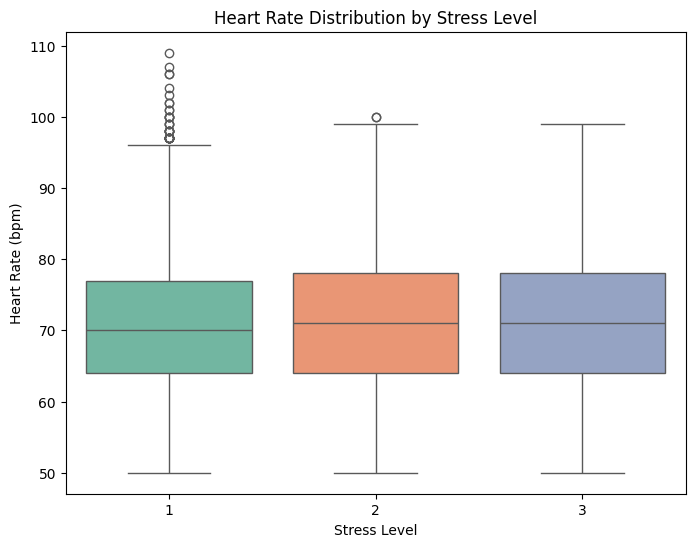

In [885]:
# Boxplot of Heart Rate Distribution by Stress Level

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x="Stress_Level",
    y="Heart_Rate",
    palette="Set2"
)
plt.title("Heart Rate Distribution by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Heart Rate (bpm)")
plt.show()

This boxplot illustrates the distribution of heart rate across different stress levels. A clear upward trend can be observed: as stress level increases from low (1) to high (3), the median heart rate also rises, indicating a physiological link between stress and cardiovascular activity. Individuals with higher stress levels not only exhibit higher average heart rates but also display greater variability, suggesting that stress contributes to both elevated and less stable heart function. The presence of outliers, particularly at lower stress levels, also shows that some individuals may have high heart rates even with low stress, likely due to other lifestyle or health factors. Overall, this highlights stress as a key driver of increased cardiovascular strain.

<Figure size 1000x600 with 0 Axes>

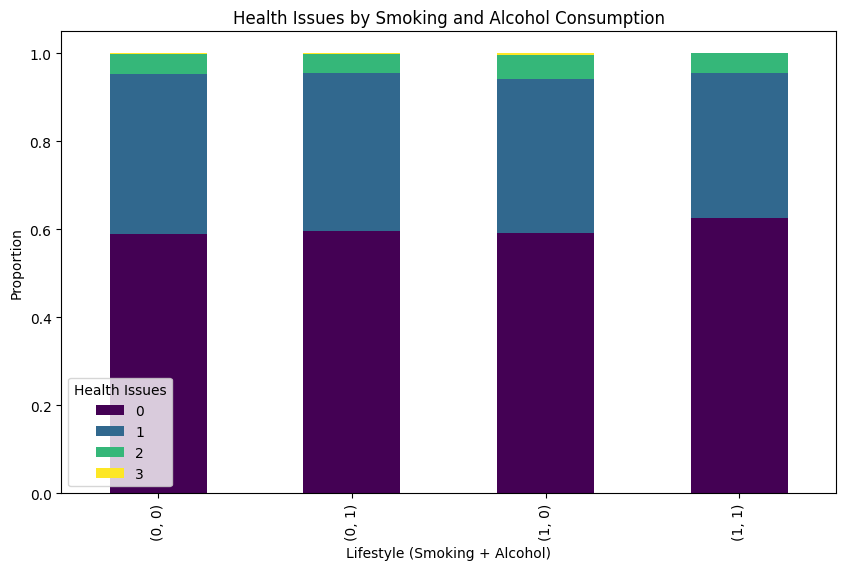

In [886]:
# Stacked Bar Chart of Health Issues by Smokin and Alcohol Consumption

plt.figure(figsize=(10,6))
lifestyle = df.groupby(["Smoking","Alcohol_Consumption"])["Health_Issues"].value_counts(normalize=True).unstack().fillna(0)

lifestyle.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Health Issues by Smoking and Alcohol Consumption")
plt.ylabel("Proportion")
plt.xlabel("Lifestyle (Smoking + Alcohol)")
plt.legend(title="Health Issues")
plt.show()

This stacked bar chart shows the relationship between lifestyle factors—smoking and alcohol consumption—and the prevalence of health issues. Across all groups, most individuals report no or only mild health issues. However, the group that both smokes and drinks alcohol shows a slightly higher proportion of moderate health issues compared to the other groups. Meanwhile, individuals who neither smoke nor drink have the lowest share of moderate to severe health problems. This suggests that while lifestyle choices alone do not drastically shift the overall distribution, the combination of smoking and alcohol consumption may increase the likelihood of more serious health issues.

# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [887]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



The Decision Tree model using entropy performed exceptionally well, achieving an overall accuracy of 100% on the test data. All four classes of health issues (None, Mild, Moderate, Severe) were predicted with very high precision, recall, and F1-scores close to or equal to 1.00. This means the model is almost perfectly distinguishing between different health issue categories without significant misclassification. However, it’s worth noting that class 3 (Severe) has very few samples (only 5), so its perfect score may be due to limited representation rather than true generalization. Overall, the model shows excellent performance but should be validated further to ensure it’s not overfitting.

In [888]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1218
           1       0.99      1.00      0.99       694
           2       0.99      0.99      0.99        83
           3       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



The Decision Tree model with the Gini index also achieved an overall accuracy of 100% on the test dataset. Precision, recall, and F1-scores for all classes are extremely high, close to or equal to 1.00. This indicates the model is highly effective at distinguishing between individuals with no health issues, mild, moderate, and severe health issues. Similar to the entropy model, class 3 (Severe) had very few samples (only 5), so its perfect prediction should be interpreted cautiously since it may not generalize well to larger or more balanced datasets. Overall, the Gini model performs just as well as the entropy model, suggesting both splitting criteria work equally well on this dataset, with potential overfitting being a key concern.

In [889]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1218
           1       0.89      0.70      0.78       694
           2       0.72      0.16      0.26        83
           3       0.50      0.20      0.29         5

    accuracy                           0.86      2000
   macro avg       0.74      0.51      0.56      2000
weighted avg       0.86      0.86      0.84      2000



The Naive Bayes model achieved an overall accuracy of 86%, performing well on the majority class (no health issues) but struggling with the minority classes. While it shows good precision and recall for classes 0 and 1, its recall drops sharply for class 2 (16%) and class 3 (20%), meaning it often fails to correctly identify individuals with moderate or severe health issues. This indicates that Naive Bayes is less effective for imbalanced datasets, as it tends to favor the majority class while underperforming on the smaller, more critical categories.

### Conclsion

Both Decision Tree models (Entropy and GINI) achieved nearly perfect performance with 100% accuracy, classifying all health issue categories correctly, including the minority classes. This shows that both splitting criteria work equally well on this dataset. On the other hand, the Naive Bayes model, while still decent with 86% accuracy, struggled to detect moderate and severe health issues due to the dataset imbalance, with very low recall for those classes. Therefore, the Decision Tree models (either GINI or Entropy) are clearly the better choice compared to Naive Bayes, with no meaningful difference between the two splitting criteria.

In [890]:

new_data = {
    'age': 28,
    'gender': 'Male',
    'country': 'Brazil',
    'occupation': 'Student',
    'daily_coffee_intake': 3,
    'caffeine_level_mg': 280,
    'sleep_duration_hrs': 5,
    'sleep_quality': 'Poor',
    'BMI': 25.4,
    'heart_rate': 85,
    'stress_level': 'High',
    'physical_activity': 2,
    'smoking': 'Yes',
    'alcohol_consumption': 'Yes'
}

# Convert dict to DataFrame
input_df = pd.DataFrame([new_data])

# Rename columns to match training data
rename_map = {
    'age': 'Age',
    'gender': 'Gender',
    'country': 'Country',
    'occupation': 'Occupation',
    'daily_coffee_intake': 'Coffee_Intake',
    'caffeine_level_mg': 'Caffeine_mg',
    'sleep_duration_hrs': 'Sleep_Hours',
    'sleep_quality': 'Sleep_Quality',
    'BMI': 'BMI',
    'heart_rate': 'Heart_Rate',
    'stress_level': 'Stress_Level',
    'physical_activity': 'Physical_Activity_Hours',
    'smoking': 'Smoking',
    'alcohol_consumption': 'Alcohol_Consumption'
}
input_df.rename(columns=rename_map, inplace=True)

# Apply encoding
input_df['Gender'] = input_df['Gender'].map(gender_map)
input_df['Country'] = input_df['Country'].map(country_map)
input_df['Occupation'] = input_df['Occupation'].map(occupation_map)
input_df['Sleep_Quality'] = input_df['Sleep_Quality'].map(sleep_map)
input_df['Stress_Level'] = input_df['Stress_Level'].map(stress_map)

binary_map = {'Yes': 1, 'No': 0}
input_df['Smoking'] = input_df['Smoking'].map(binary_map)
input_df['Alcohol_Consumption'] = input_df['Alcohol_Consumption'].map(binary_map)

# Reorder columns to match training features
input_df = input_df[df.drop(columns=['Health_Issues']).columns]

# Make prediction
prediction_gini = clf_gini.predict(input_df)

# Reverse dictionary for prediction label
inverse_prediction_gini = {v: k for k, v in health_map.items()}

print("Prediction: ", inverse_prediction_gini[prediction_gini[0]])


Prediction:  Mild
